# ENSO 2t notebook

This notebook contains access of ERA5 data with the `Teleconnection` class and evaluation of the ENSO Nino3.4 with `2t` variable. This is not the variable that is usually used for ENSO evaluation, but it is a case study to check if it can be used as substitute when the `sst` variable is missing. This is the current situation with the DestinE control run.

## Running the teleconnection

In [1]:
from teleconnections import Teleconnection

In [2]:
telecname = 'ENSO_2t' # ENSO with 2t as variable

model = 'ERA5'
exp = 'era5'
source = 'monthly'

In [3]:
telec = Teleconnection(model=model, exp=exp, source=source, telecname=telecname, regrid='r100')

2023-08-31 14:49:50 :: Teleconnection :: WARNING  -> No time aggregation will be performed


In [4]:
telec.run()

/work/bb1153/b382289/mambaforge/envs/aqua_common/lib/python3.11/site-packages/xarray/core/indexing.py:1443: PerformanceWarning: Slicing with an out-of-order index is generating 83 times more chunks
  return self.array[key]


## ENSO index

The ENSO index can be evaluated by using the library function `regional_mean_anomalies` from the `index.py` file.
The index can be evaluated with a custom rolling window to average data (standard is 3 months, it can be specified as argument `month_windows` while initializing the Teleconnection class).

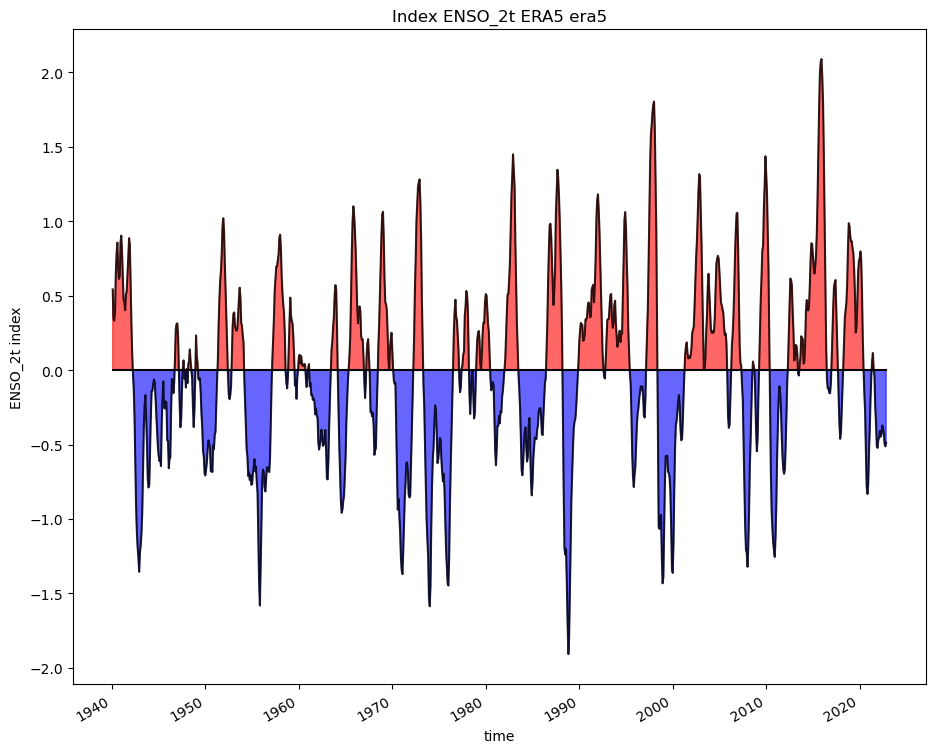

In [5]:
telec.plot_index()

## Regression

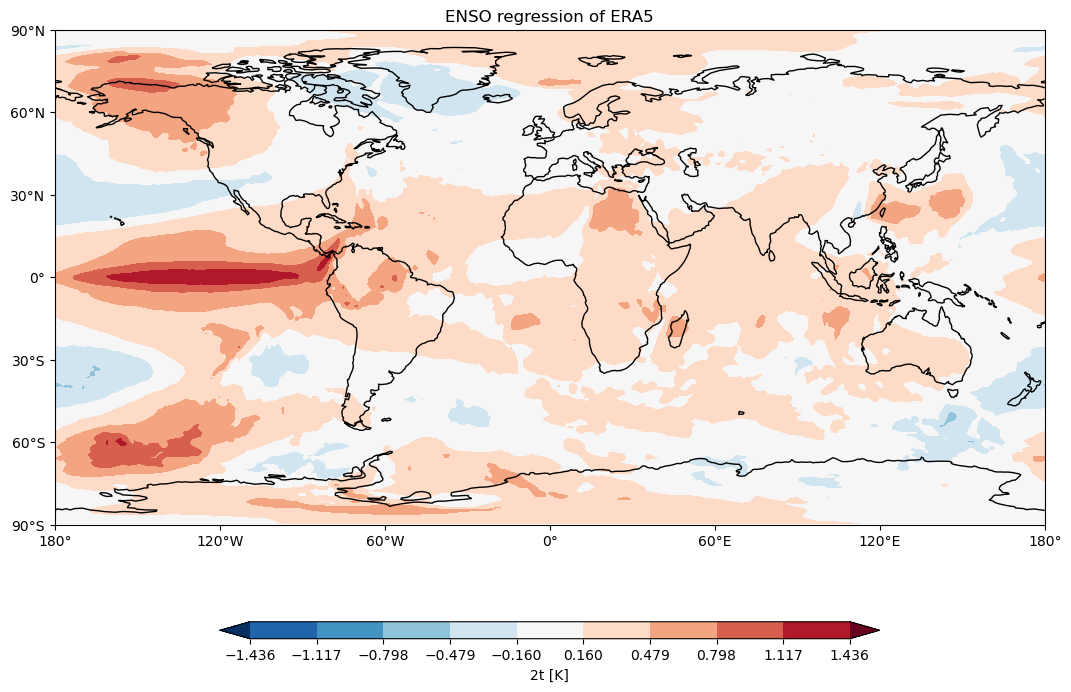

In [6]:
from teleconnections.plots import single_map_plot

single_map_plot(map=telec.regression, model=telec.model, exp=telec.exp, cbar_label='2t [K]', title='ENSO regression of ERA5')

## Correlation

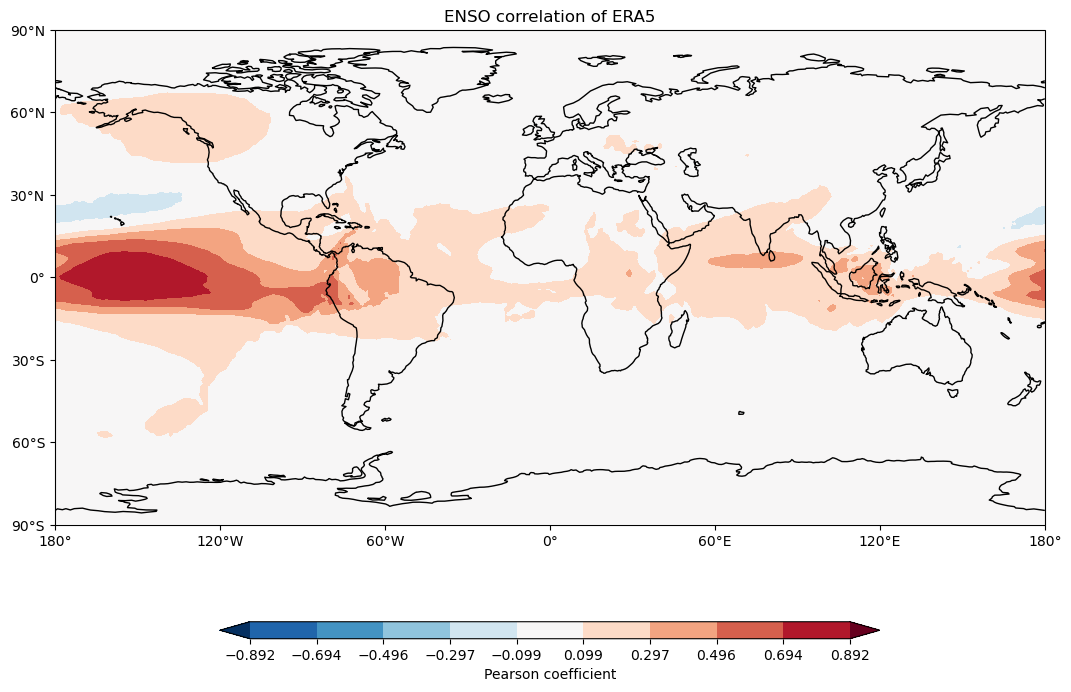

In [7]:
single_map_plot(map=telec.correlation, model=telec.model, exp=telec.exp, cbar_label='Pearson coefficient', title='ENSO correlation of ERA5')

## Comparison with NCAR data <a class="anchor" id="ncar"></a>

We can estimate if ENSO can be reasonably computed also with the `2t` variable by comparing the Nino3.4 index with the one observed by NCAR.

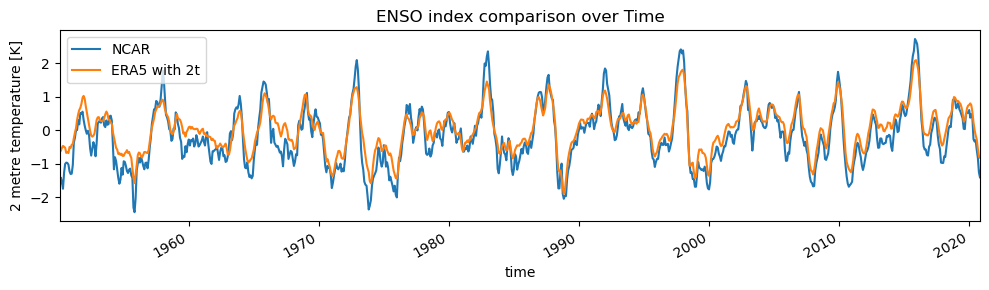

In [8]:
import datetime
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

ncar_path = '../data/nina34.anom.txt'
enso_ncar = np.genfromtxt(ncar_path,skip_header=3,skip_footer=4)

year = enso_ncar[:,0]
month_data = enso_ncar[:, 1:]
time = xr.cftime_range(start=str(int(year[0])),periods=12*len(year),freq='MS',calendar='standard')
month_data = month_data.reshape(-1)
enso_ncar = xr.DataArray(month_data, coords=[time], dims=['time'], name='monthly_data')

time_vals = np.array(time.values)

# Convert to datetime objects
datetimes = [np.datetime64(t).astype(datetime.datetime) for t in time_vals]

# Plot with matplotlib
fig = plt.figure(figsize=(10,3))
plt.plot(datetimes, enso_ncar.values,label='NCAR')

plt.xlim(datetime.datetime(1950, 1, 31, 0, 0),datetime.datetime(2020, 10, 31, 0, 0))

telec.index.plot(label='ERA5 with 2t')
plt.legend()
plt.title('ENSO index comparison over Time')
fig.tight_layout()

plt.show()